In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Using the existing filter2D to Sobel filter the image

albert_img = cv.imread("a1images/a1images/einstein.png", cv.IMREAD_GRAYSCALE)
albert_img.shape



(380, 364)

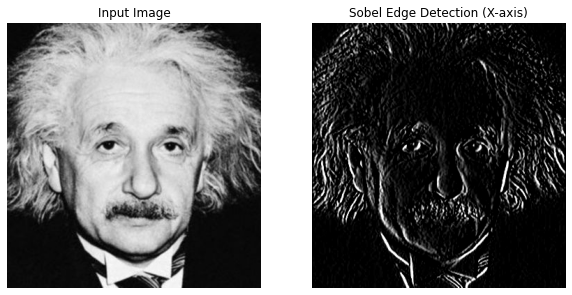

In [15]:
# Define a kernel for Sobel filtering to detect horizontal edges
sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

# Perform edge detection by applying the Sobel filter in the x-direction
edges_x = cv.filter2D(albert_img, -1, sobel_x_kernel)

# Display the input and processed images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(albert_img, cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges_x, cmap='gray')
plt.title('Sobel Edge Detection (X-axis)')
plt.axis('off')

plt.show()

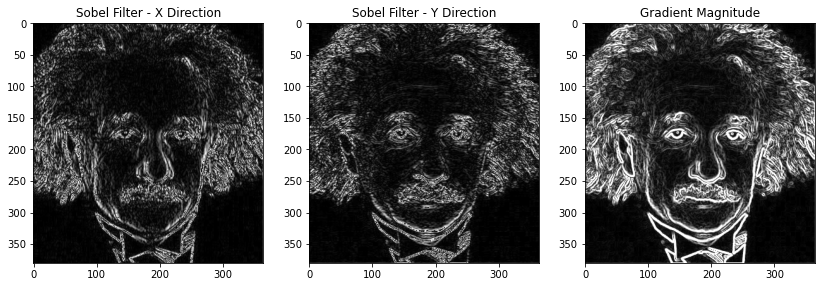

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [16]:
# Retrieve the image dimensions
height, width = albert_img.shape

# Define the Sobel operators for edge detection
sobel_kernel_x = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

sobel_kernel_y = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

# Create arrays to store the results of the convolution
sobel_x = np.zeros_like(albert_img, dtype=np.float64)
sobel_y = np.zeros_like(albert_img, dtype=np.float64)

# Pad the image to ensure proper handling at the borders
padded_img = np.pad(albert_img, ((1, 1), (1, 1)), mode='constant')

# Perform manual convolution with the Sobel operators
for i in range(1, height+1):
    for j in range(1, width+1):
        # Extract a 3x3 neighborhood from the padded image
        region = padded_img[i-1:i+2, j-1:j+2]
        
        # Apply Sobel operators for edge detection in x and y directions
        gx = np.sum(sobel_kernel_x * region)
        gy = np.sum(sobel_kernel_y * region)
        
        # Save the convolution result in the corresponding arrays
        sobel_x[i-1, j-1] = gx
        sobel_y[i-1, j-1] = gy

# Calculate the gradient magnitude from the horizontal and vertical gradients
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.clip(sobel_magnitude, 0, 255)  # Ensure pixel values remain valid

# Convert the result to an 8-bit format for display
sobel_x = np.uint8(np.abs(sobel_x))
sobel_y = np.uint8(np.abs(sobel_y))
sobel_magnitude = np.uint8(sobel_magnitude)

# Visualize the results of the Sobel filtering
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel Filter - X Direction')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Filter - Y Direction')

plt.subplot(1, 3, 3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.show()

# Print the Sobel kernel for the x-direction
print(sobel_kernel_x)


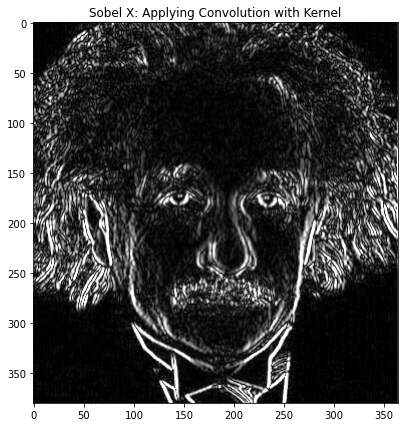

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [17]:
# Define the kernel for detecting horizontal edges (Sobel X operator)
sobel_kernel_x = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

# Create an empty array to store the filtered image result for horizontal edges
sobel_x = np.zeros_like(albert_img, dtype=np.float64)

# Add padding to the image to handle edge pixels during convolution
padded_img = np.pad(albert_img, ((1, 1), (1, 1)), mode='constant')

# Manually apply the Sobel X operator to the image
for i in range(1, height + 1):
    for j in range(1, width + 1):
        # Extract a 3x3 region from the padded image centered at the current pixel
        region = padded_img[i - 1:i + 2, j - 1:j + 2]
        
        # Perform convolution using the Sobel X kernel for horizontal edges
        gx = np.sum(sobel_kernel_x * region)
        
        # Store the result in the output array at the corresponding position
        sobel_x[i - 1, j - 1] = gx

# Normalize and convert the filtered result to 8-bit integer format for visualization
sobel_x = np.uint8(np.clip(np.abs(sobel_x), 0, 255))

# Display the output image after applying the Sobel X filter
plt.figure(figsize=(7, 7))

plt.subplot(1, 1, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X: Applying Convolution with Kernel')

plt.show()

# Output the Sobel X kernel used for filtering
print(sobel_kernel_x)


### Using a seperable sobel filter

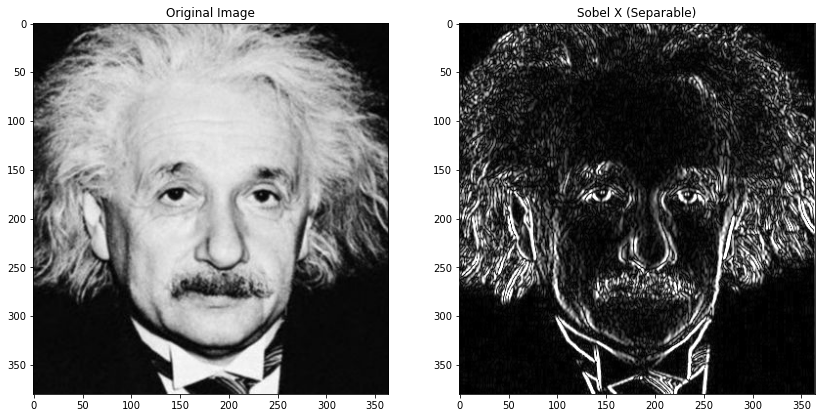

In [18]:
# Define the 1D Sobel kernels (separable)
sobel_kernel_v = np.array([1, 2, 1])  # Vertical 1D kernel (for smoothing)
sobel_kernel_h = np.array([1, 0, -1])  # Horizontal 1D kernel (for edge detection)

# Initialize empty arrays to store intermediate and final results
sobel_x_intermediate = np.zeros_like(albert_img, dtype=np.float64)
sobel_x = np.zeros_like(albert_img, dtype=np.float64)

# Padding the image to handle the edges (for 1D vertical filter)
padded_img = np.pad(albert_img, ((1, 1), (0, 0)), mode='constant')

# Step 1: Apply vertical 1D kernel (along the rows)
for i in range(1, height+1):
    for j in range(0, width):
        # Apply the vertical kernel to the 3-pixel neighborhood in the column
        sobel_x_intermediate[i-1, j] = np.sum(padded_img[i-1:i+2, j] * sobel_kernel_v)

# Padding the intermediate result for horizontal filtering
padded_intermediate = np.pad(sobel_x_intermediate, ((0, 0), (1, 1)), mode='constant')

# Step 2: Apply horizontal 1D kernel (along the columns)
for i in range(0, height):
    for j in range(1, width+1):
        # Apply the horizontal kernel to the 3-pixel neighborhood in the row
        sobel_x[i, j-1] = np.sum(padded_intermediate[i, j-1:j+2] * sobel_kernel_h)

# Convert the result back to uint8 format, normalizing the values to 0-255
sobel_x = np.uint8(np.clip(np.abs(sobel_x), 0, 255))
# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(albert_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X (Separable)')

plt.show()
